# Week 4

In [1]:
# Samuel Harris
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
df = pd.read_csv('/Users/samharris/Desktop/Capstone/24Spr_-S-Harris-_-disasters-/Sample_Capstone/data/em_dat_since2000_and_w_bank.csv')
print(df.shape)
df.head()

(15573, 44)


,DisNo.,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Event Name,ISO,Country,Subregion,...,i_mort,co2_emissions,electricity_percentage,life_expectancy,mv_gdp,mv_imort,mv_electy,mv_pop_den,mv_co2,mv_lf_exp
0,1999-9388-DJI,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,DJI,Djibouti,Sub-Saharan Africa,...,78.0,0.491842,56.119118,56.903,2.0,10.0,3.0,3.0,3.0,1.0
1,1999-9388-SDN,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,SDN,Sudan,Northern Africa,...,67.0,0.216388,23.000000,58.319,1.0,9.0,1.0,1.0,2.0,2.0
2,1999-9388-SOM,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,SOM,Somalia,Sub-Saharan Africa,...,104.5,0.055793,2.109354,50.660,NaN,10.0,1.0,1.0,1.0,1.0
3,2000-0001-AGO,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,AGO,Angola,Sub-Saharan Africa,...,121.9,0.988416,24.238865,46.024,1.0,10.0,1.0,1.0,4.0,1.0
4,2000-0002-AGO,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,AGO,Angola,Sub-Saharan Africa,...,121.9,0.988416,24.238865,46.024,1.0,10.0,1.0,1.0,4.0,1.0


In [3]:
df['Location'].head(10)

0    Ali Sabieh, Dikhil, Djibouti, Obock, Tadjourah...
1    Northern Darfur, Northern Kordofan, Red Sea pr...
2    Ceel Barde, Rab Dhuure, Tayeeglow, Xudur distr...
3                                               Calulo
4    Dombre Grande village (Baia Farta district, Be...
5    Barisal, Chittagong, Dhaka, Khulna, Rajshahi, ...
6               Pouso Redondo (Etat de Santa Catarina)
7                                               Fujian
8                            Xiangtan (Hunan Province)
9                                             Al-Ayyat
Name: Location, dtype: object

# Spatial Analysis

In [4]:
df.columns

Index(['DisNo.', 'Classification Key', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Event Name', 'ISO', 'Country',
       'Subregion', 'Region', 'Location', 'Origin', 'Associated Types',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'Total Affected', 'Total Damage, Adjusted ('000 US$)',
       'Admin Units', 'gdp_per_cap', 'pop_den', 'i_mort', 'co2_emissions',
       'electricity_percentage', 'life_expectancy', 'mv_gdp', 'mv_imort',
       'mv_electy', 'mv_pop_den', 'mv_co2', 'mv_lf_exp'],
      dtype='object')

In [5]:
# Rescale Cost to be in millions
df.rename(columns={"Total Damage, Adjusted ('000 US$)": "Total Damage, Adjusted (US$ (millions)"}, inplace=True)

df["Total Damage, Adjusted (US$ (millions)"] = (df["Total Damage, Adjusted (US$ (millions)"] / 1000000)

In [6]:
def summary_statistics_by_region(data, variable):
    # Generate title from variable name
    title = f"Summary Statistics for '{variable}' by Region"

    print(title)
    
    # Grouping by 'Region' and 'Subregion' and calculating summary statistics
    summary_stats = data.groupby(['Region', 'Subregion'])[variable].describe()
    
    # Reset index to access 'Region' and 'Subregion' as columns
    summary_stats_reset = summary_stats.reset_index()
    
    # Sorting by mean within each region
    summary_stats_sorted = summary_stats_reset.sort_values(by=['Region', 'mean'], ascending=[True, False])
    
    # Set the DataFrame index
    summary_stats_sorted.set_index(['Region', 'Subregion'], inplace=True)
    
    return summary_stats_sorted


#summary_statistics_by_region(df, 'Total Deaths')
#summary_statistics_by_region(df, 'Total Affected')
summary_statistics_by_region(df, "Total Damage, Adjusted (US$ (millions)")

Summary Statistics for 'Total Damage, Adjusted (US$ (millions)' by Region


count      mean        std  \
Region   Subregion                                                     
Africa   Northern Africa                   32.0  0.490988   1.403824   
         Sub-Saharan Africa               150.0  0.199788   0.538602   
Americas Northern America                 463.0  3.533057  12.997966   
         Latin America and the Caribbean  412.0  0.805633   4.577440   
Asia     Eastern Asia                     606.0  2.050966  12.637831   
         Southern Asia                    236.0  0.969711   2.326239   
         Western Asia                      56.0  0.649206   2.357134   
         South-eastern Asia               487.0  0.337523   2.513337   
         Central Asia                      28.0  0.078608   0.217396   
Europe   Western Europe                    93.0  1.863892   5.208416   
         Northern Europe                   41.0  1.155749   1.985496   
         Southern Europe                  125.0  1.121029   2.832154   
         Eastern Europe                   129.0  0.337149   0.666198   
Oceania  Australia and New Zealand        113.0  0.951193   2.361121   
         Polynesia                         14.0  0.079699   0.074097   
         Melanesia                         30.0  0.069795   0.159707   
         Micronesia                         6.0  0.038917   0.052225   

                                               min       25%       50%  \
Region   Subregion                                                       
Africa   Northern Africa                  0.000075  0.009699  0.063948   
         Sub-Saharan Africa               0.000013  0.005877  0.025182   
Americas Northern America                 0.000263  0.197582  0.764798   
         Latin America and the Caribbean  0.000017  0.012419  0.077058   
Asia     Eastern Asia                     0.000017  0.052470  0.239277   
         Southern Asia                    0.000000  0.027258  0.149751   
         Western Asia                     0.000000  0.016180  0.100288   
         South-eastern Asia               0.000000  0.002976  0.017997   
         Central Asia                     0.000282  0.002464  0.010601   
Europe   Western Europe                   0.000080  0.149855  0.445445   
         Northern Europe                  0.000081  0.103248  0.422838   
         Southern Europe                  0.000268  0.066393  0.220045   
         Eastern Europe                   0.000081  0.010759  0.054542   
Oceania  Australia and New Zealand        0.000813  0.054001  0.134129   
         Polynesia                        0.002388  0.013410  0.070760   
         Melanesia                        0.000726  0.007118  0.023335   
         Micronesia                       0.000813  0.002674  0.009816   

                                               75%         max  
Region   Subregion                                              
Africa   Northern Africa                  0.435835    7.954379  
         Sub-Saharan Africa               0.137726    4.200000  
Americas Northern America                 2.348681  187.319074  
         Latin America and the Caribbean  0.441412   81.186997  
Asia     Eastern Asia                     0.875267  273.218373  
         Southern Asia                    0.735157   19.779307  
         Western Asia                     0.369356   16.961487  
         South-eastern Asia               0.100525   52.041595  
         Central Asia                     0.067652    1.141789  
Europe   Western Europe                   1.256261   43.201120  
         Northern Europe                  1.481690   10.027082  
         Southern Europe                  0.801300   20.139674  
         Eastern Europe                   0.299711    4.133704  
Oceania  Australia and New Zealand        0.674169   19.515598  
         Polynesia                        0.123636    0.232409  
         Melanesia                        0.056933    0.731615  
         Micronesia                       0.076610    0.113889

#### Highest Median Costs Occur in US and Europe, confirming bias to countries with better cost reporting

In [7]:
summary_statistics_by_region(df, 'Total Deaths')

Summary Statistics for 'Total Deaths' by Region


count        mean          std  \
Region   Subregion                                                          
Africa   Northern Africa                   588.0   68.971088   533.337412   
         Sub-Saharan Africa               2788.0   67.341105   450.449890   
Americas Latin America and the Caribbean  1706.0  167.754982  5391.918592   
         Northern America                  576.0   21.197917    88.428595   
Asia     South-eastern Asia               1318.0  295.542489  5953.979240   
         Southern Asia                    1909.0  166.573075  2069.103346   
         Western Asia                      524.0  138.162214  2198.744060   
         Eastern Asia                     1534.0  108.019557  2291.673547   
         Central Asia                       83.0   16.891566    16.202237   
Europe   Western Europe                    253.0  249.118577  1502.336622   
         Southern Europe                   407.0  205.366093  1639.389791   
         Eastern Europe                    528.0  144.662879  2427.891161   
         Northern Europe                    95.0   96.536842   445.961997   
Oceania  Polynesia                          15.0   28.133333    42.077932   
         Melanesia                          75.0   21.800000    40.910251   
         Australia and New Zealand          85.0   19.341176    50.794064   
         Micronesia                         11.0   15.181818    25.525745   

                                          min   25%   50%   75%       max  
Region   Subregion                                                         
Africa   Northern Africa                  1.0  12.0  18.0  30.0   12352.0  
         Sub-Saharan Africa               1.0  11.0  19.0  37.0   20000.0  
Americas Latin America and the Caribbean  1.0   5.0  13.0  25.0  222570.0  
         Northern America                 0.0   3.0   9.0  17.0    1833.0  
Asia     South-eastern Asia               1.0   7.0  16.0  34.0  165708.0  
         Southern Asia                    1.0  14.0  25.0  48.0   73338.0  
         Western Asia                     1.0  10.0  15.0  28.0   50096.0  
         Eastern Asia                     1.0  11.0  18.0  32.0   87476.0  
         Central Asia                     1.0   4.5  13.0  21.0      74.0  
Europe   Western Europe                   1.0   2.0   5.0  15.0   19490.0  
         Southern Europe                  1.0   3.0  10.0  22.0   20089.0  
         Eastern Europe                   1.0   6.0  12.0  25.0   55736.0  
         Northern Europe                  1.0   2.0   6.0  17.0    3469.0  
Oceania  Polynesia                        1.0   2.5   9.0  27.0     148.0  
         Melanesia                        1.0   2.0   8.0  18.0     246.0  
         Australia and New Zealand        1.0   1.0   3.0  11.0     347.0  
         Micronesia                       1.0   1.5   3.0  12.5      80.0

Highest Mean Deaths: South East Asia, Western Europe, Southern Europe, Latin America

Highest Median Deaths: Africa and Asia

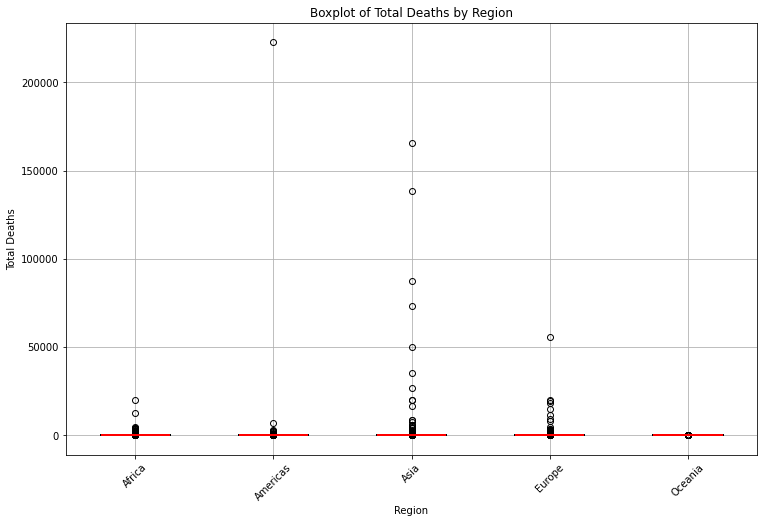

In [8]:
def plot_boxplot_grouped_by_variable(data, gb_variable, variable):
    # Create a boxplot grouped by 'gb_variable'
    boxprops = dict(linestyle='-', linewidth=2, color='black')
    medianprops = dict(linestyle='-', linewidth=2, color='red')
    whiskerprops = dict(linestyle='--', linewidth=1, color='black')
    capprops = dict(linestyle='-', linewidth=1, color='black')
    
    data.boxplot(column=variable, by=f'{gb_variable}', figsize=(12, 8), boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops)
    
    # Set plot title and labels
    plt.title(f'Boxplot of {variable} by {gb_variable}')
    plt.xlabel('Region')
    plt.ylabel(variable)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    plt.suptitle("")
    
    # Show plot
    plt.show()


plot_boxplot_grouped_by_variable(df, 'Region', 'Total Deaths')


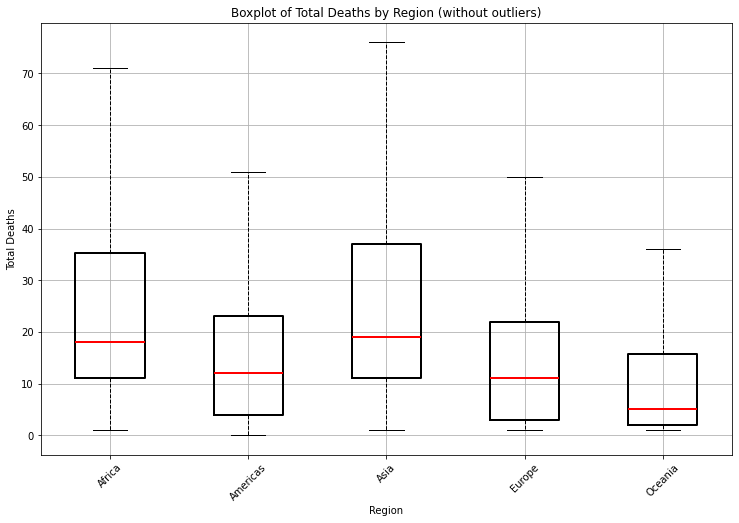

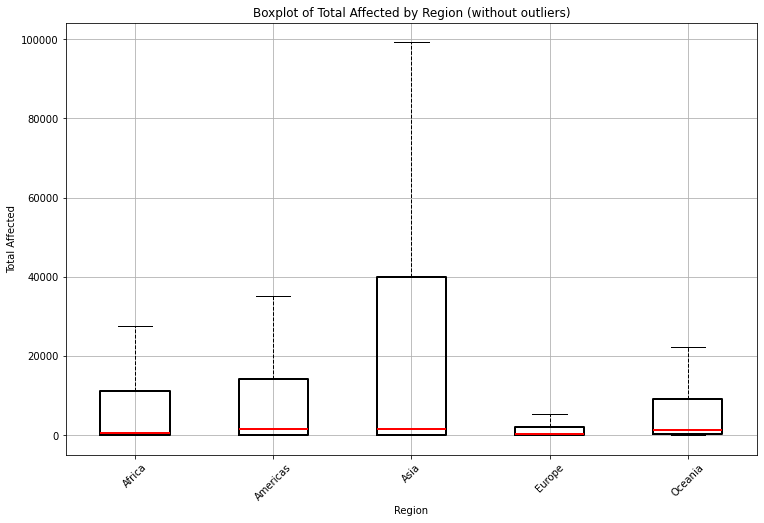

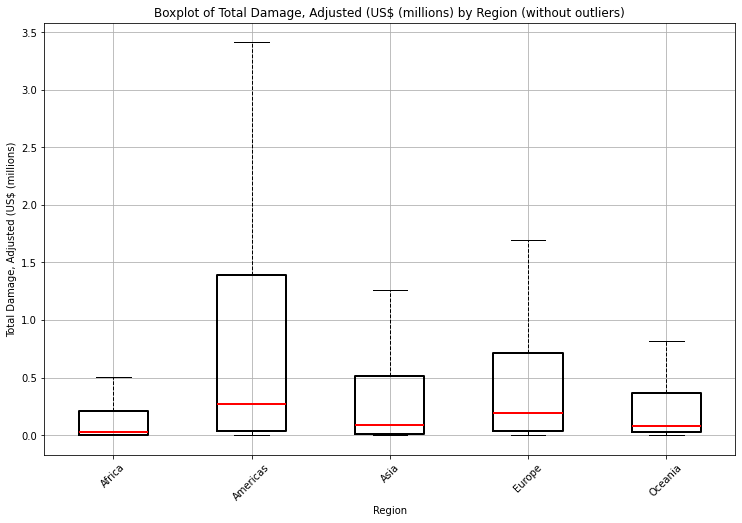

In [9]:

def plot_boxplot_grouped_by_variable_no_outlier(data, gb_variable, variable):
    # Create a boxplot grouped by 'gb_variable' without showing outliers
    boxprops = dict(linestyle='-', linewidth=2, color='black')
    medianprops = dict(linestyle='-', linewidth=2, color='red')
    whiskerprops = dict(linestyle='--', linewidth=1, color='black')
    capprops = dict(linestyle='-', linewidth=1, color='black')
    
    data.boxplot(column=variable, by=f'{gb_variable}', figsize=(12, 8), showfliers=False, boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops)
    
    # Set plot title and labels
    plt.title(f'Boxplot of {variable} by {gb_variable} (without outliers)')
    plt.xlabel('Region')
    plt.ylabel(variable)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Remove the automatically added title
    plt.suptitle("")
    
    # Show plot
    plt.show()


plot_boxplot_grouped_by_variable_no_outlier(df, 'Region', 'Total Deaths')
plot_boxplot_grouped_by_variable_no_outlier(df, 'Region', 'Total Affected')
plot_boxplot_grouped_by_variable_no_outlier(df, 'Region', 'Total Damage, Adjusted (US$ (millions)')

Deaths in Africa and Asia Seem have a higher distrubution then the rest of the continents.
Lets look by subreigon next

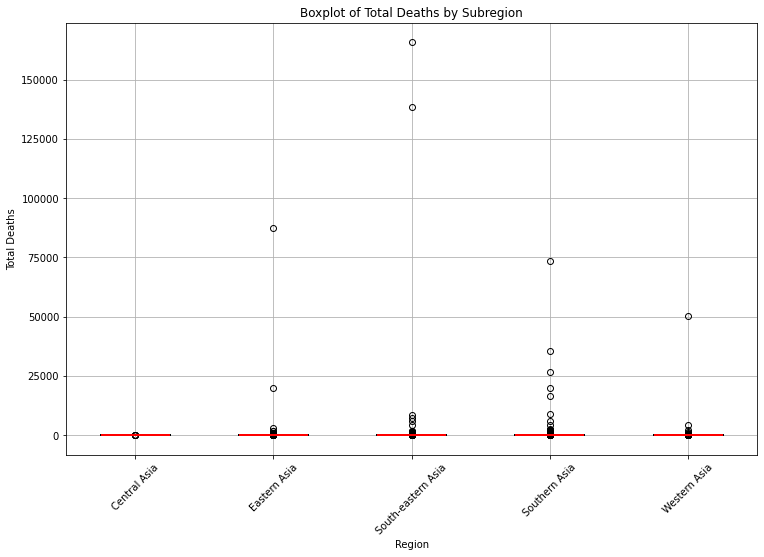

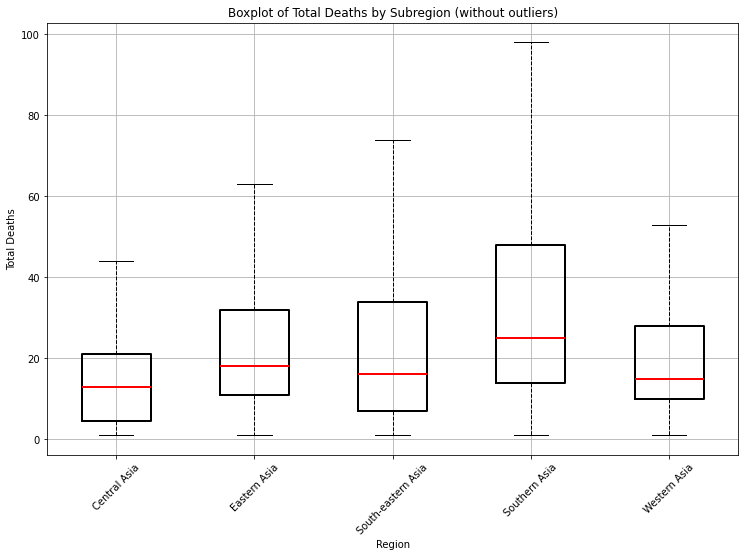

In [10]:
_df = df[df['Region']=='Asia']
plot_boxplot_grouped_by_variable(_df, 'Subregion', 'Total Deaths')
plot_boxplot_grouped_by_variable_no_outlier(_df, 'Subregion', 'Total Deaths')

South Eastern Asia and Southern Asia prone to lots of disasters

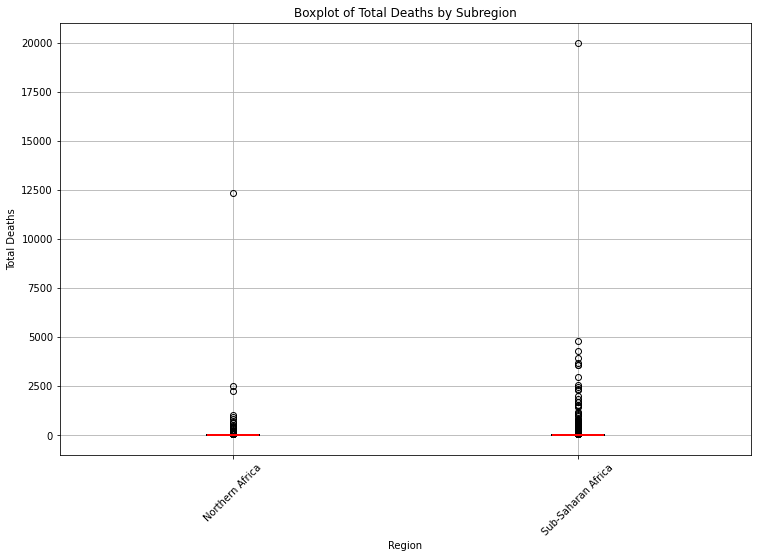

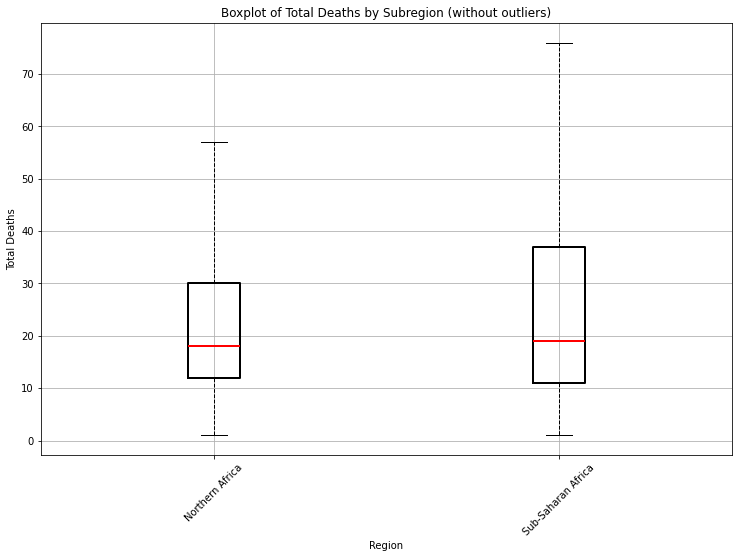

In [11]:
_df = df[df['Region']=='Africa']
plot_boxplot_grouped_by_variable(_df, 'Subregion', 'Total Deaths')
plot_boxplot_grouped_by_variable_no_outlier(_df, 'Subregion', 'Total Deaths')

Sub Saharan Africa is also high for deaths
Now, What type of Disasters are happening where? 

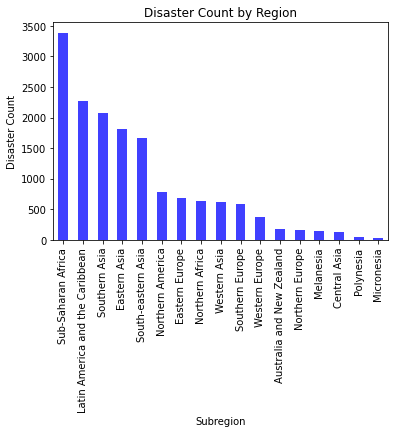

,Region,Subregion,Disaster Count
1,Africa,Sub-Saharan Africa,3385
2,Americas,Latin America and the Caribbean,2273
7,Asia,Southern Asia,2072
5,Asia,Eastern Asia,1806
6,Asia,South-eastern Asia,1668
3,Americas,Northern America,782
9,Europe,Eastern Europe,691
0,Africa,Northern Africa,631
8,Asia,Western Asia,612
11,Europe,Southern Europe,589


In [12]:

disaster_counts = df.groupby(['Region', 'Subregion'])['Disaster Type'].count().reset_index(name='Disaster Count')
disaster_counts_sorted = disaster_counts.sort_values(by='Disaster Count', ascending=False)
disaster_counts_sorted.head(30)

disaster_counts_sorted.plot(kind='bar', x='Subregion', y='Disaster Count', color='blue', alpha=0.75, legend=None)

# Add labels and title
plt.xlabel('Subregion')
plt.ylabel('Disaster Count')
plt.title('Disaster Count by Region')

# Show the plot
plt.show()
disaster_counts_sorted.head(30)

Frequent disasters occur in Sub saharan Africa,  Latin America, Soutehrn Asia, Eastern Asia, South Eastern Asia

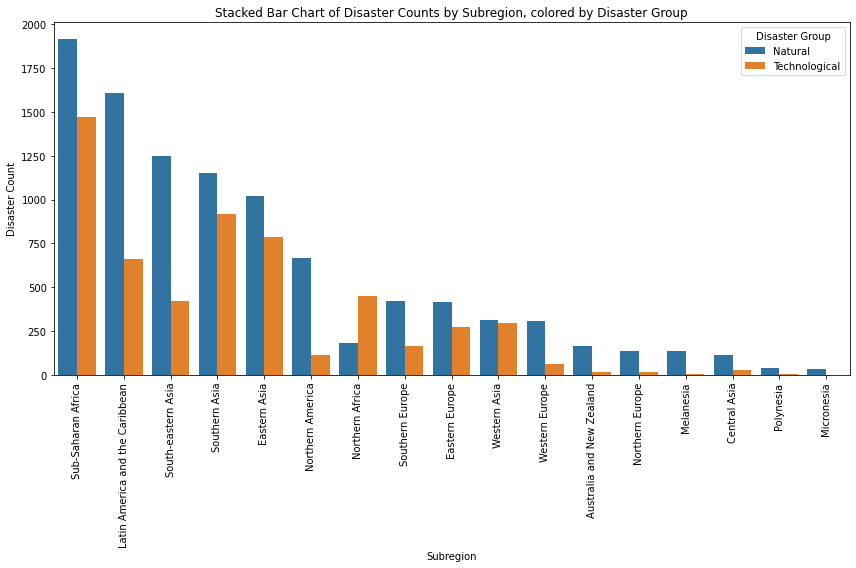

,Subregion,Disaster Group,Disaster Count
28,Sub-Saharan Africa,Natural,1915
8,Latin America and the Caribbean,Natural,1609
29,Sub-Saharan Africa,Technological,1470
22,South-eastern Asia,Natural,1246
24,Southern Asia,Natural,1152
4,Eastern Asia,Natural,1021
25,Southern Asia,Technological,920
5,Eastern Asia,Technological,785
16,Northern America,Natural,667
9,Latin America and the Caribbean,Technological,664


In [13]:
disaster_counts = df.groupby(['Subregion', 'Disaster Group'])['Disaster Type'].count().reset_index(name='Disaster Count')
disaster_counts_sorted = disaster_counts.sort_values(by='Disaster Count', ascending=False)


# Create a bar plot with bars stacked on top of each other
plt.figure(figsize=(12, 8))
sns.barplot(data=disaster_counts_sorted, x='Subregion', y='Disaster Count', hue='Disaster Group', dodge=True)

# Add labels and title
plt.xlabel('Subregion')
plt.ylabel('Disaster Count')
plt.title('Stacked Bar Chart of Disaster Counts by Subregion, colored by Disaster Group')

# Rotate x-labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.legend(title='Disaster Group')
plt.tight_layout()
plt.show()

disaster_counts_sorted.head(30)

Human caused disasters more often in asia and africa

In [14]:
disaster_counts = df.groupby(['Region', 'Subregion', 'Disaster Subtype'])['Disaster Type'].count().reset_index(name='Disaster Count')
disaster_counts_sorted = disaster_counts.sort_values(by='Disaster Count', ascending=False)
disaster_counts_sorted.head(30)

,Region,Subregion,Disaster Subtype,Disaster Count
67,Africa,Sub-Saharan Africa,Road,730
66,Africa,Sub-Saharan Africa,Riverine flood,446
115,Americas,Latin America and the Caribbean,Riverine flood,391
323,Asia,Southern Asia,Road,373
116,Americas,Latin America and the Caribbean,Road,357
123,Americas,Latin America and the Caribbean,Tropical cyclone,350
36,Africa,Sub-Saharan Africa,Bacterial disease,344
75,Africa,Sub-Saharan Africa,Water,329
49,Africa,Sub-Saharan Africa,Flood (General),282
202,Asia,Eastern Asia,Explosion (Industrial),279


Road, Flood, Cyclone, epidemics common in Asia and Africa

In [15]:
df.columns

Index(['DisNo.', 'Classification Key', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Event Name', 'ISO', 'Country',
       'Subregion', 'Region', 'Location', 'Origin', 'Associated Types',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'Total Affected',
       'Total Damage, Adjusted (US$ (millions)', 'Admin Units', 'gdp_per_cap',
       'pop_den', 'i_mort', 'co2_emissions', 'electricity_percentage',
       'life_expectancy', 'mv_gdp', 'mv_imort', 'mv_electy', 'mv_pop_den',
       'mv_co2', 'mv_lf_exp'],
      dtype='object')

Next Step: Plotly Map showing disaster cost with year slider. If you click on the country, more stats are given including that countries worst disaster that year. So for that worst disaster show subtype, location, name, number of deaths, cost, Date, mag scale.

In [16]:
import plotly.express as px

_d = df.loc[:, ['Country', 'Start Year', 'ISO', 'Total Deaths']].groupby(['Country', 'Start Year', 'ISO'], as_index=False).sum().rename(columns={'Total Deaths': 'Total Deaths'})

fig = px.choropleth(_d, 
                    locations='ISO', 
                    color='Total Deaths', 
                    hover_name='Country', 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame='Start Year') 

#fig.update_layout(title_text='Costs Map with Year Slider')
#fig.show()

In [17]:
import plotly.express as px

_d = df.groupby(['Country', 'Start Year', 'ISO'], as_index=False).sum().rename(columns={'Total Deaths': 'Total Deaths'})
max_deaths = df.groupby(['Country', 'Start Year'])['Total Deaths'].max().reset_index().rename(columns={'Total Deaths': 'Max Deaths'})
disaster_count = df.groupby(['Country', 'Start Year'])['Classification Key'].count().reset_index().rename(columns={'Classification Key': 'Disaster Count'})

_d = _d.merge(max_deaths, on=['Country', 'Start Year'], how='left')
_d = _d.merge(disaster_count, on=['Country', 'Start Year'], how='left')


_d['hover_text'] = _d['Country'] + '<br>' + \
                   'Max Deaths (Worst Disaster): ' + _d['Max Deaths'].astype(str) + '<br>' + \
                   'Disaster Count: ' + _d['Disaster Count'].astype(str)

fig = px.choropleth(_d, 
                    locations='ISO', 
                    color='Total Deaths', 
                    hover_name='Country', 
                    hover_data={'hover_text': True},  # Add hover text
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame='Start Year') 

#fig.update_layout(title_text='Costs Map with Year Slider')
#fig.show()


In [18]:
### Test

df['Total Deaths'] = df['Total Deaths'].fillna(0)
max_death_events = df.loc[df.groupby(['Country', 'Start Year'])['Total Deaths'].idxmax(), ['Country', 'Start Year', 'Disaster Subtype', 'Location', 'Event Name']] # Adjust columns as needed

_d = df.groupby(['Country', 'Start Year', 'ISO'], as_index=False).sum().rename(columns={'Total Deaths': 'Total Deaths'})
max_deaths = df.groupby(['Country', 'Start Year'])['Total Deaths'].max().reset_index().rename(columns={'Total Deaths': 'Max Deaths'})
disaster_count = df.groupby(['Country', 'Start Year'])['Classification Key'].count().reset_index().rename(columns={'Classification Key': 'Disaster Count'})

_d = _d.merge(max_deaths, on=['Country', 'Start Year'], how='left')
_d = _d.merge(disaster_count, on=['Country', 'Start Year'], how='left')
_d = _d.merge(max_death_events, on=['Country', 'Start Year'], how='left')

_d['hover_text'] = _d['Country'] + '<br>' + \
                   'Deaths (Worst Disaster): ' + _d['Max Deaths'].astype(str) + '<br>' + \
                   'Disaster Subtype (Worst Disaster): ' + _d['Disaster Subtype_y'].astype(str) + '<br>' + \
                   'Event Name (Worst Disaster): ' + _d['Event Name_y'].astype(str) + '<br>' + \
                   'Total Disaster Count: ' + _d['Disaster Count'].astype(str)


fig = px.choropleth(_d, 
                    locations='ISO', 
                    color='Total Deaths', 
                    hover_name='Country', 
                    hover_data={'hover_text': True},  # Add hover text
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame='Start Year') 

fig.update_layout(title_text='Deaths Map with Year Slider')
fig.show()

### Created Map which shows deaths by color with a year slider. It also shows the worst disaster that occurred that year in the country that you hover over

## Week 5

In [19]:
df.columns

Index(['DisNo.', 'Classification Key', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Event Name', 'ISO', 'Country',
       'Subregion', 'Region', 'Location', 'Origin', 'Associated Types',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'Total Affected',
       'Total Damage, Adjusted (US$ (millions)', 'Admin Units', 'gdp_per_cap',
       'pop_den', 'i_mort', 'co2_emissions', 'electricity_percentage',
       'life_expectancy', 'mv_gdp', 'mv_imort', 'mv_electy', 'mv_pop_den',
       'mv_co2', 'mv_lf_exp'],
      dtype='object')

In [20]:
df.isna().sum()

DisNo.                                        0
Classification Key                            0
Disaster Group                                0
Disaster Subgroup                             0
Disaster Type                                 0
Disaster Subtype                              0
Event Name                                10666
ISO                                           0
Country                                       0
Subregion                                     0
Region                                        0
Location                                    628
Origin                                    11702
Associated Types                          12373
Appeal                                        0
Declaration                                   0
AID Contribution ('000 US$)               15083
Magnitude                                 12217
Magnitude Scale                            5839
Latitude                                  13764
Longitude                               

In [21]:
# For events with a defined start and end date
_d = df.dropna(subset =['End Day'])
_d = _d.dropna(subset =['Start Day'])
_d.shape

(13978, 44)

In [22]:
import pandas as pd

# Assuming _d is your DataFrame

# Define a function to parse the date string and convert it into datetime
def parse_date(row):
    try:
        parts = row.split('-')  # Split the string by dashes
        year = int(parts[0])  # Extract the year part
        month = int(parts[1].split('.')[0])  # Extract the month part and remove any trailing decimals
        day = int(parts[2].split('.')[0])  # Extract the day part and remove any trailing decimals
        return pd.Timestamp(year=year, month=month, day=day)  # Create a datetime object
    except:
        return pd.NaT  # Return NaT if parsing fails

# Apply the custom function to create the 'Start Date' column
_d['Start Date'] = _d['Start Year'].astype(str) + '-' + _d['Start Month'].astype(str) + '-' + _d['Start Day'].astype(str)
_d['Start Date'] = _d['Start Date'].apply(parse_date)

_d['End Date'] = _d['End Year'].astype(str) + '-' + _d['End Month'].astype(str) + '-' + _d['End Day'].astype(str)
_d['End Date'] = _d['End Date'].apply(parse_date)

# Drop the original separate columns if needed
_d.drop(['Start Year', 'Start Month', 'Start Day'], axis=1, inplace=True)
_d.drop(['End Year', 'End Month', 'End Day'], axis=1, inplace=True)

print(_d['Start Date'])
print(_d['End Date'])

3       2000-01-26
4       2000-01-08
6       2000-01-12
7       2000-01-01
8       2000-01-09
           ...    
15563   2023-12-25
15564   2023-12-26
15565   2023-12-30
15566   2023-12-07
15571   2023-03-01
Name: Start Date, Length: 13978, dtype: datetime64[ns]
3       2000-01-26
4       2000-01-15
6       2000-01-12
7       2000-01-01
8       2000-01-09
           ...    
15563   2023-12-25
15564   2023-12-26
15565   2024-01-03
15566   2024-01-15
15571   2023-12-31
Name: End Date, Length: 13978, dtype: datetime64[ns]


#### Now we have the start and end date variables

In [23]:

_d['Event Duration'] = _d['End Date'] - _d['Start Date']


In [24]:
_d['Event Duration']

3         0 days
4         7 days
6         0 days
7         0 days
8         0 days
          ...   
15563     0 days
15564     0 days
15565     4 days
15566    39 days
15571   305 days
Name: Event Duration, Length: 13978, dtype: timedelta64[ns]

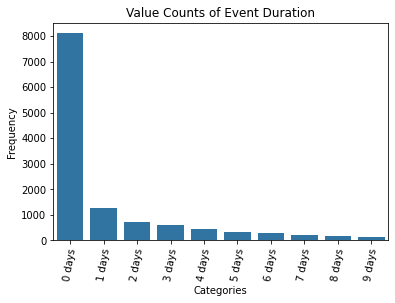

In [25]:
# Calculate the value counts of the column
value_counts = _d['Event Duration'].value_counts().head(10)

# Create a bar plot using Seaborn
sns.barplot(x=value_counts.index, y=value_counts.values)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Value Counts of Event Duration')

# Rotate x-axis labels if needed
plt.xticks(rotation=80)

# Show the plot
plt.show()


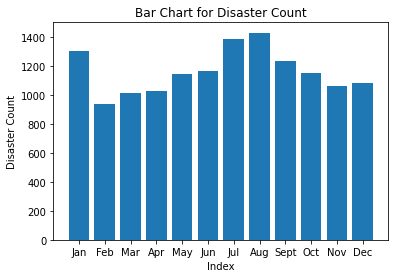

In [26]:
# Group by month
_d_month = _d.groupby(_d['Start Date'].dt.month).count()

# Rename the index to month names if needed
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
_d_month.index = [month_names[i-1] for i in _d_month.index]

# Plot a bar chart
plt.bar(_d_month.index, _d_month['DisNo.'])

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Disaster Count')
plt.title('Bar Chart for Disaster Count')

# Show the plot
plt.show()

In [27]:
_d['Disaster Type'].value_counts()

Disaster Type
Flood                               3695
Storm                               2457
Road                                2084
Water                               1093
Earthquake                           658
Epidemic                             473
Explosion (Industrial)               454
Mass movement (wet)                  439
Air                                  429
Fire (Miscellaneous)                 410
Extreme temperature                  264
Rail                                 247
Wildfire                             213
Miscellaneous accident (General)     176
Explosion (Miscellaneous)            158
Collapse (Miscellaneous)             156
Collapse (Industrial)                145
Volcanic activity                    114
Fire (Industrial)                    110
Industrial accident (General)         99
Gas leak                              33
Chemical spill                        20
Poisoning                             14
Mass movement (dry)                   13
Dr

<Figure size 1008x432 with 0 Axes>

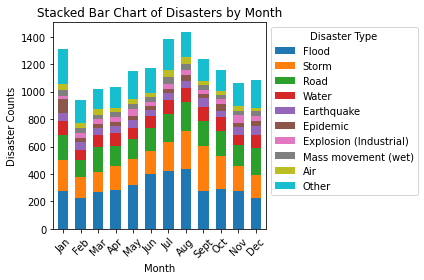

In [28]:
# Count the occurrences of each disaster type
_d['Month'] = _d['Start Date'].dt.month
disaster_type_counts = _d['Disaster Type'].value_counts()

# Select the top 9 most common disaster types
top_disaster_types = disaster_type_counts.head(9).index

# Group by month and disaster type, then count the occurrences
_d_grouped = _d.groupby(['Month', 'Disaster Type']).size().unstack(fill_value=0)

# Combine the counts of remaining disaster types into an 'Other' category
other_disaster_types = disaster_type_counts.index.difference(top_disaster_types)
_d_grouped['Other'] = _d_grouped[other_disaster_types].sum(axis=1)

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
_d_grouped.index = [month_names[i-1] for i in _d_grouped.index]

# Plot a stacked bar chart with increased width
plt.figure(figsize=(14, 6))  # Adjust the figure size as needed
_d_grouped[top_disaster_types.tolist() + ['Other']].plot(kind='bar', stacked=True, width=0.6)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Disaster Counts')
plt.title('Stacked Bar Chart of Disasters by Month')

# Show the legend outside the chart area
plt.legend(title='Disaster Type', loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

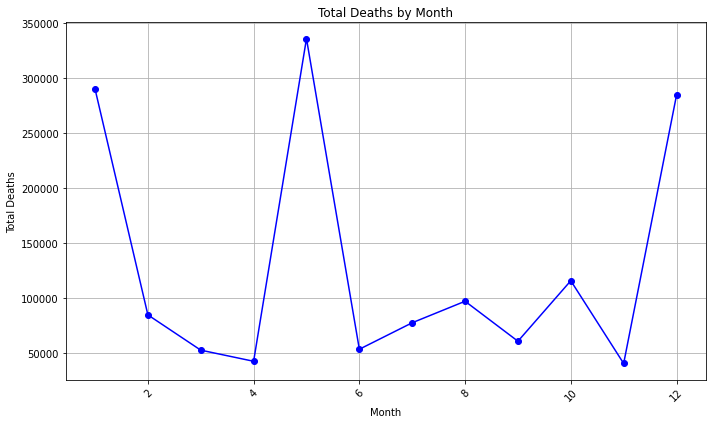

In [29]:
import numpy as np

total_deaths_by_month = _d.groupby('Month')['Total Deaths'].sum()

# Convert index and values to NumPy arrays
months = total_deaths_by_month.index.to_numpy()
total_deaths = total_deaths_by_month.to_numpy()

# Plot a point for each month representing the total deaths
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(months, total_deaths, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Deaths')
plt.title('Total Deaths by Month')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.grid(True)  # Add grid for better readability
plt.show()


In [30]:
def deaths_by_month_and_country(country_name):
    #Group by month and country and sum the total deaths
    total_deaths_by_month = _d.groupby(['Month', 'Country'])['Total Deaths'].sum().reset_index()

    # Now 'Country' is a column, but you can still group by it if needed
    country_data = total_deaths_by_month[total_deaths_by_month['Country'] == country_name]

    # Plot a point for each month representing the total deaths
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    plt.plot(np.array(country_data['Month']), np.array(country_data['Total Deaths']), marker='o', linestyle='-', color='b')

    # Add labels and title
    plt.xlabel('Month')
    plt.ylabel('Total Deaths')
    plt.title('Total Deaths by Month for {}'.format(country_name))  # Include country name in the title

    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.grid(True)  # Add grid for better readability
    plt.show()


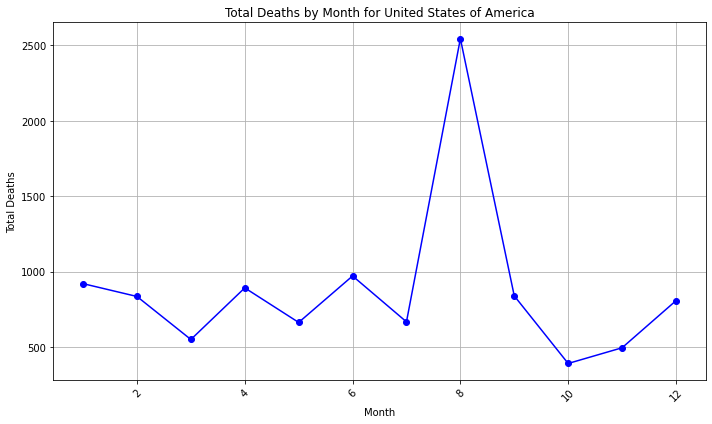

In [31]:
deaths_by_month_and_country('United States of America')

In [32]:
_d.columns

Index(['DisNo.', 'Classification Key', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Event Name', 'ISO', 'Country',
       'Subregion', 'Region', 'Location', 'Origin', 'Associated Types',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin',
       'Total Deaths', 'Total Affected',
       'Total Damage, Adjusted (US$ (millions)', 'Admin Units', 'gdp_per_cap',
       'pop_den', 'i_mort', 'co2_emissions', 'electricity_percentage',
       'life_expectancy', 'mv_gdp', 'mv_imort', 'mv_electy', 'mv_pop_den',
       'mv_co2', 'mv_lf_exp', 'Start Date', 'End Date', 'Event Duration',
       'Month'],
      dtype='object')

## World Bank data analysis

In [33]:
df[['pop_den', 'gdp_per_cap', 'i_mort', 'co2_emissions', 'electricity_percentage', 'life_expectancy']].describe()

,pop_den,gdp_per_cap,i_mort,co2_emissions,electricity_percentage,life_expectancy
count,14315.000000,14729.000000,14236.000000,13636.000000,14294.000000,14299.000000
mean,165.534984,9159.295795,32.568383,3.826551,77.380793,68.845704
std,465.200761,15182.690477,27.346521,4.667229,30.195993,8.873568
min,1.583894,110.460875,1.700000,0.000000,1.277265,41.957000
25%,35.063329,1022.732467,10.900000,0.637262,59.500000,63.571500
50%,89.607769,2671.777522,23.600000,1.752534,95.726227,70.720000
75%,176.721733,8329.002067,49.300000,5.563294,99.800000,75.340000
max,20734.058442,133711.794436,138.600000,39.582140,100.000000,85.492683


In [34]:
df.columns

Index(['DisNo.', 'Classification Key', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Event Name', 'ISO', 'Country',
       'Subregion', 'Region', 'Location', 'Origin', 'Associated Types',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'Total Affected',
       'Total Damage, Adjusted (US$ (millions)', 'Admin Units', 'gdp_per_cap',
       'pop_den', 'i_mort', 'co2_emissions', 'electricity_percentage',
       'life_expectancy', 'mv_gdp', 'mv_imort', 'mv_electy', 'mv_pop_den',
       'mv_co2', 'mv_lf_exp'],
      dtype='object')

### Mapped world bank columns to a 1 to 10 value to get a better analysis for rich v poor countries

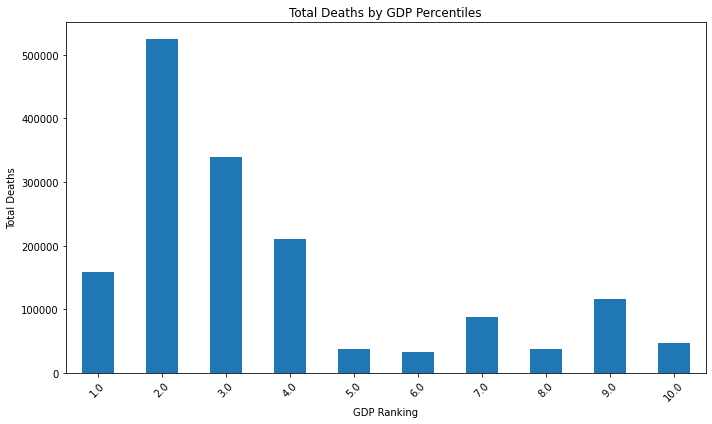

In [35]:
grouped_data = df.groupby('mv_gdp')['Total Deaths'].sum()

# Plotting
plt.figure(figsize=(10, 6))  # Adjust size if necessary
grouped_data.plot(kind='bar')
plt.xlabel('GDP Ranking')
plt.ylabel('Total Deaths')
plt.title('Total Deaths by GDP Percentiles')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Week 6

In [36]:
df.columns

Index(['DisNo.', 'Classification Key', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Event Name', 'ISO', 'Country',
       'Subregion', 'Region', 'Location', 'Origin', 'Associated Types',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'Total Affected',
       'Total Damage, Adjusted (US$ (millions)', 'Admin Units', 'gdp_per_cap',
       'pop_den', 'i_mort', 'co2_emissions', 'electricity_percentage',
       'life_expectancy', 'mv_gdp', 'mv_imort', 'mv_electy', 'mv_pop_den',
       'mv_co2', 'mv_lf_exp'],
      dtype='object')

In [37]:
df[['mv_gdp', 'mv_imort', 'mv_electy', 'mv_pop_den',
       'mv_co2', 'mv_lf_exp']].describe()

,mv_gdp,mv_imort,mv_electy,mv_pop_den,mv_co2,mv_lf_exp
count,14729.000000,14236.000000,14294.000000,14315.000000,13636.000000,14299.000000
mean,4.482314,5.914793,4.827970,5.837164,5.248020,4.930764
std,2.719276,2.782448,2.681278,2.882878,2.891678,2.719372
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,6.000000,5.000000,6.000000,5.000000,5.000000
75%,6.000000,8.000000,6.000000,8.000000,8.000000,7.000000
max,10.000000,10.000000,9.000000,10.000000,10.000000,10.000000


In [38]:
df['Total Deaths'] = df['Total Deaths'].replace(0, np.nan)

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

_d = df.dropna(subset=['Total Deaths'])

# Split the dataset into features (X) and target variable (y)
X = _d[['mv_gdp', 'mv_imort', 'mv_electy', 'mv_pop_den',
       'mv_co2', 'mv_lf_exp']]  # Features
y = _d['Total Deaths'] # Target variable

# Normalize the target variable to a scale between 0 and 10 based on percentiles
y_percentile = np.percentile(y, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
y_normalized = np.searchsorted(y_percentile, y) * 10 / len(y_percentile)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_normalized, test_size=0.2, random_state=42)

# Create a pipeline with imputer and linear regression
pipeline = make_pipeline(SimpleImputer(strategy='mean'), LinearRegression())

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Squared Error: 6.8038817374784335
R^2 Score: 0.08627130000116945


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset, for example using pandas
_d = df.dropna(subset=['Total Deaths'])

# Split the dataset into features (X) and target variable (y)
X = _d[[ 'Disaster Type', 'Country', 'Start Year', 'Start Month', 'mv_gdp', 'mv_imort', 'mv_electy', 'mv_pop_den',
       'mv_co2', 'mv_lf_exp']]   # Features
y = _d['Total Deaths'] # Target variable

# Normalize the target variable to a scale between 0 and 10 based on percentiles
y_percentile = np.percentile(y, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
y_normalized = np.searchsorted(y_percentile, y) * 10 / len(y_percentile)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_normalized, test_size=0.2, random_state=42)

# Define the categorical columns
categorical_cols = [  'Disaster Type', 'Country',  'Start Year', 'Start Month']

# Define the preprocessing steps (one-hot encoding for categorical features and imputation for missing values)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols),
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=['number']).columns)
    ],
    remainder='passthrough'
)

# Define the linear regression model
model = LinearRegression()

# Create a pipeline with preprocessing and linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# Get the feature names after one-hot encoding
one_hot_feature_names = preprocessor.transformers_[0][1]['onehot'].get_feature_names_out(input_features=categorical_cols)

# Combine one-hot encoded feature names with numerical feature names
feature_names = list(one_hot_feature_names) + list(X.select_dtypes(include=['number']).columns)

# Extract coefficients (weights) from the linear regression model
coefficients = pipeline.named_steps['model'].coef_

# Create a DataFrame to display feature names along with their coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients DataFrame by absolute values of coefficients
coefficients_df_sorted = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

# Print the sorted DataFrame
coefficients_df_sorted.head(20)

Mean Squared Error: 5.751432747774087
R^2 Score: 0.22761015394986117


,Feature,Coefficient
31,Country_American Samoa,4.225589
107,Country_Guyana,4.000513
87,Country_Eritrea,3.812507
140,Country_Marshall Islands,-3.623506
123,Country_Kiribati,3.461519
2,Disaster Type_Chemical spill,-3.423275
187,Country_Serbia,-3.402049
213,Country_Trinidad and Tobago,-3.332957
42,Country_Barbados,-3.143780
33,Country_Antigua and Barbuda,-3.065681


#### The world Bank Columns are not very helpful improving a regression model predicting deaths, I do not think a linear model would necessarily capture the full picture of deaths by disaster anyways. Reigon and disastertype are obviously helpful predictors. However, plugging in just country names may be too specific and lead to overfitting anyways. Lets try reducing dimensionality a bit using singular value decomposition

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import TruncatedSVD  

# Load your dataset, for example using pandas
_d = df.dropna(subset=['Total Deaths'])

# Split the dataset into features (X) and target variable (y)
X = _d[['Disaster Type', 'Country', 'mv_gdp', 'mv_imort', 'mv_electy', 'mv_pop_den',
       'mv_co2', 'mv_lf_exp']]   # Features
y = _d['Total Deaths'] # Target variable

# Normalize the target variable to a scale between 0 and 10 based on percentiles
y_percentile = np.percentile(y, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
y_normalized = np.searchsorted(y_percentile, y) * 10 / len(y_percentile)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_normalized, test_size=0.2, random_state=42)

# Define the categorical columns
categorical_cols = ['Country', 'Disaster Type']

# Define the preprocessing steps (one-hot encoding for categorical features and imputation for missing values)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols),
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=['number']).columns)
    ],
    remainder='passthrough'
)

# Define the TruncatedSVD step
svd = TruncatedSVD(n_components=20)  

# Define the linear regression model
model = LinearRegression()

# Create a pipeline with preprocessing, TruncatedSVD, and linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svd', svd),
    ('model', model)
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# Extract the components from TruncatedSVD
components = pipeline.named_steps['svd'].components_

# Calculate the importance of each feature in the original space based on the components
feature_importance = np.abs(components).sum(axis=0) / np.abs(components).sum()

# Get the feature names after one-hot encoding
one_hot_feature_names = preprocessor.transformers_[0][1]['onehot'].get_feature_names_out(input_features=categorical_cols)

# Combine one-hot encoded feature names with numerical feature names
feature_names = list(one_hot_feature_names) + list(X.select_dtypes(include=['number']).columns)

# Create a DataFrame to display feature names along with their importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the importance DataFrame by importance
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame
importance_df_sorted.head(20)

Mean Squared Error: 5.992840610140153
R^2 Score: 0.19519023532690882


,Feature,Importance
37,Country_China,0.039617
214,Disaster Type_Explosion (Industrial),0.038178
197,Country_United States of America,0.037440
212,Disaster Type_Earthquake,0.036812
83,Country_India,0.036569
213,Disaster Type_Epidemic,0.036435
84,Country_Indonesia,0.036360
206,Disaster Type_Air,0.036292
234,mv_gdp,0.035953
224,Disaster Type_Mass movement (wet),0.035667


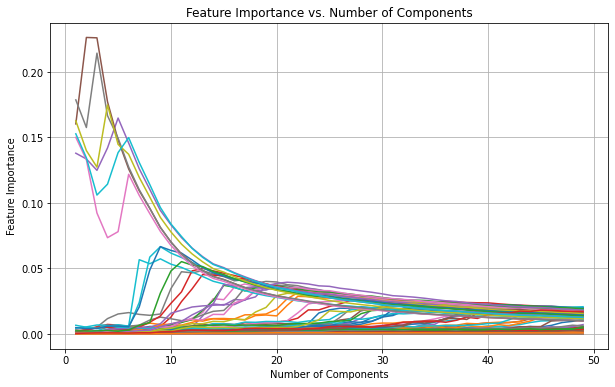

In [42]:
import matplotlib.pyplot as plt

# List to store feature importance scores for each number of components
feature_importance_scores = []

# Range of number of components to try
n_components_range = range(1, 50)

# Iterate over different numbers of components
for n_components in n_components_range:
    # Define TruncatedSVD with the current number of components
    svd = TruncatedSVD(n_components=n_components)
    
    # Create a pipeline with preprocessing and TruncatedSVD
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('svd', svd)
    ])

    # Fit the pipeline on training data
    pipeline.fit(X_train)
    
    # Extract the components from TruncatedSVD
    components = pipeline.named_steps['svd'].components_
    
    # Calculate the importance of each feature based on the components
    feature_importance = np.abs(components).sum(axis=0) / np.abs(components).sum()
    
    # Store the feature importance scores
    feature_importance_scores.append(feature_importance)

# Convert feature importance scores to a numpy array for easier manipulation
feature_importance_scores = np.array(feature_importance_scores)

# Plot feature importance scores against number of components
plt.figure(figsize=(10, 6))
for feature_idx, feature_name in enumerate(feature_names):
    plt.plot(n_components_range, feature_importance_scores[:, feature_idx], label=feature_name)

plt.xlabel('Number of Components')
plt.ylabel('Feature Importance')
plt.title('Feature Importance vs. Number of Components')
#plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Importances start to stabilize when the number of components is 20. Trying to balance stability in target variables with accuracy to determine some sort relationship between features and target. I could do more prepocessing work with one hot encoded vectors to not give importance to rare vectors

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import TruncatedSVD  

# Define a function to handle rare categories
def handle_rare_categories(data, threshold=0.01, replacement='rare_category'):
    """
    Handle rare categories by grouping them into a single category.

    Parameters:
    - data: DataFrame containing categorical variables
    - threshold: Threshold for considering a category as rare (default: 0.01)
    - replacement: Replacement value for rare categories (default: 'rare_category')

    Returns:
    - data_processed: DataFrame with rare categories replaced
    """

    data_processed = data.copy()

    for column in data_processed.columns:
        frequencies = data_processed[column].value_counts(normalize=True)
        rare_categories = frequencies[frequencies < threshold].index
        data_processed[column] = data_processed[column].replace(rare_categories, replacement)

    return data_processed

# Load your dataset, for example using pandas
_d = df.dropna(subset=['Total Deaths'])

# Split the dataset into features (X) and target variable (y)
X = _d[['Disaster Type', 'Country', 'mv_gdp', 'mv_imort', 'mv_electy', 'mv_pop_den',
       'mv_co2', 'mv_lf_exp']]   # Features
y = _d['Total Deaths'] # Target variable

# Normalize the target variable to a scale between 0 and 10 based on percentiles
y_percentile = np.percentile(y, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
y_normalized = np.searchsorted(y_percentile, y) * 10 / len(y_percentile)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_normalized, test_size=0.2, random_state=42)

# Define the categorical columns
categorical_cols = ['Country', 'Disaster Type']

# Handle rare categories in the categorical columns
X_rare_handled = handle_rare_categories(X[categorical_cols])

# Define the preprocessing steps (one-hot encoding for categorical features and imputation for missing values)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), X_rare_handled.columns),  # Use the handled rare categories columns
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=['number']).columns)
    ],
    remainder='passthrough'
)

# Define the TruncatedSVD step
svd = TruncatedSVD(n_components=25)  

# Define the linear regression model
model = LinearRegression()

# Create a pipeline with preprocessing, TruncatedSVD, and linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svd', svd),
    ('model', model)
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# Extract the components from TruncatedSVD
components = pipeline.named_steps['svd'].components_

# Calculate the importance of each feature in the original space based on the components
feature_importance = np.abs(components).sum(axis=0) / np.abs(components).sum()

# Get the feature names after one-hot encoding
one_hot_feature_names = preprocessor.transformers_[0][1]['onehot'].get_feature_names_out(input_features=X_rare_handled.columns)

# Combine one-hot encoded feature names with numerical feature names
feature_names = list(one_hot_feature_names) + list(X.select_dtypes(include=['number']).columns)

# Create a DataFrame to display feature names along with their importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the importance DataFrame by importance
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame
print(importance_df_sorted.head(20))

Mean Squared Error: 5.977384302013551
R^2 Score: 0.19726594341182557
                                  Feature  Importance
214  Disaster Type_Explosion (Industrial)    0.036334
216     Disaster Type_Extreme temperature    0.032955
212              Disaster Type_Earthquake    0.032031
37                          Country_China    0.032024
84                      Country_Indonesia    0.031742
197      Country_United States of America    0.031424
206                     Disaster Type_Air    0.030770
83                          Country_India    0.030727
224     Disaster Type_Mass movement (wet)    0.030312
213                Disaster Type_Epidemic    0.030140
131                       Country_Nigeria    0.029894
218    Disaster Type_Fire (Miscellaneous)    0.029556
230                   Disaster Type_Storm    0.028820
232                   Disaster Type_Water    0.028095
229                    Disaster Type_Road    0.028017
239                             mv_lf_exp    0.027663
234          

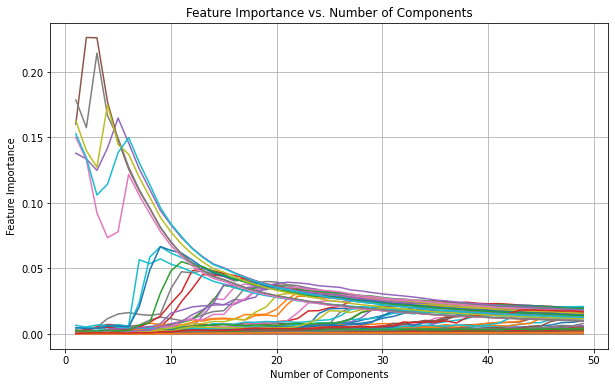

In [44]:
import matplotlib.pyplot as plt

# List to store feature importance scores for each number of components
feature_importance_scores = []

# Range of number of components to try
n_components_range = range(1, 50)

# Iterate over different numbers of components
for n_components in n_components_range:
    # Define TruncatedSVD with the current number of components
    svd = TruncatedSVD(n_components=n_components)
    
    # Create a pipeline with preprocessing and TruncatedSVD
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('svd', svd)
    ])

    # Fit the pipeline on training data
    pipeline.fit(X_train)
    
    # Extract the components from TruncatedSVD
    components = pipeline.named_steps['svd'].components_
    
    # Calculate the importance of each feature based on the components
    feature_importance = np.abs(components).sum(axis=0) / np.abs(components).sum()
    
    # Store the feature importance scores
    feature_importance_scores.append(feature_importance)

# Convert feature importance scores to a numpy array for easier manipulation
feature_importance_scores = np.array(feature_importance_scores)

# Plot feature importance scores against number of components
plt.figure(figsize=(10, 6))
for feature_idx, feature_name in enumerate(feature_names):
    plt.plot(n_components_range, feature_importance_scores[:, feature_idx], label=feature_name)

plt.xlabel('Number of Components')
plt.ylabel('Feature Importance')
plt.title('Feature Importance vs. Number of Components')
#plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Not much new information. Will look into different modeling techniques that may be better and support nonlinearitys. It may be able to show a better relationship between world bank data, location, and disaster type and the outcome variable of deaths. Again, this is not predicting the exact count of deaths per disaster event, I have normalized the death variable by percentile, so it is predicting relative severity on a 0-10 scale.
Indicators on disaster risk reading: 
https://www.ipcc.ch/apps/njlite/srex/njlite_download.php?id=6132#:~:text=The%20system%20of%20indicators%20covers,prone%3B%20the%20capacity%20of%20the

Countries with high importance correlate significantly with the death outcome of a disaster event. Certain disaster types also have high importance expectedly. 

### Next Steps: Develop a methodology which incorporates no. affected, deaths, frequency of disaster types, and world bank factors so that we can assign a disasor risk factor score to each country. 

In [45]:
df.columns

Index(['DisNo.', 'Classification Key', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Event Name', 'ISO', 'Country',
       'Subregion', 'Region', 'Location', 'Origin', 'Associated Types',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'Total Affected',
       'Total Damage, Adjusted (US$ (millions)', 'Admin Units', 'gdp_per_cap',
       'pop_den', 'i_mort', 'co2_emissions', 'electricity_percentage',
       'life_expectancy', 'mv_gdp', 'mv_imort', 'mv_electy', 'mv_pop_den',
       'mv_co2', 'mv_lf_exp'],
      dtype='object')

# Week 7

##### Interesting risk index from FEMA https://hazards.fema.gov/nri/map. Plan to do something similar for countries. Frequency, impact, Resilience. 

In [46]:
country_result = df.groupby(['Country', 'ISO'])['Disaster Type'].value_counts()
result_df = country_result.reset_index(name='count')

# Group the counts by disaster type
counts_by_disaster_type = result_df.groupby('Disaster Type')['count'].sum()


# Calculate the relative frequency for each disaster type
result_df['relative_frequency'] = result_df.apply(lambda row: row['count'] / counts_by_disaster_type[row['Disaster Type']], axis=1)


# Calculate the scaling factor for each disaster type
max_relative_frequency_by_disaster_type = result_df.groupby('Disaster Type')['relative_frequency'].max()
scaling_factors = 100 / max_relative_frequency_by_disaster_type

# Scale the relative frequency for each disaster type
result_df['scaled_relative_frequency'] = result_df.apply(lambda row: row['relative_frequency'] * scaling_factors[row['Disaster Type']], axis=1)

result_df

,Country,ISO,Disaster Type,count,relative_frequency,scaled_relative_frequency
0,Afghanistan,AFG,Flood,85,0.021261,39.170507
1,Afghanistan,AFG,Earthquake,21,0.031915,18.918919
2,Afghanistan,AFG,Mass movement (wet),21,0.046980,37.500000
3,Afghanistan,AFG,Road,20,0.009483,10.204082
4,Afghanistan,AFG,Epidemic,16,0.017937,25.396825
...,...,...,...,...,...,...
1869,Zimbabwe,ZWE,Miscellaneous accident (General),3,0.016129,10.000000
1870,Zimbabwe,ZWE,Rail,2,0.008097,3.636364
1871,Zimbabwe,ZWE,Collapse (Industrial),1,0.006849,3.225806
1872,Zimbabwe,ZWE,Industrial accident (General),1,0.009804,1.515152


##### Created frequency Statistic for each country based on disaster type

In [47]:
result_df2 = df.groupby(['Country', 'ISO', 'Disaster Type'])[['Total Deaths', 'Total Affected']].sum()
result_df2 = result_df2.reset_index()


# Group the counts by disaster type
deaths_by_disaster_type = result_df2.groupby('Disaster Type')['Total Deaths'].sum()


# Calculate the relative frequency for each disaster type
result_df2['relative_deaths'] = result_df2.apply(lambda row: row['Total Deaths'] / deaths_by_disaster_type[row['Disaster Type']], axis=1)


# Calculate the scaling factor for each disaster type
max_relative_frequency_by_disaster_type = result_df2.groupby('Disaster Type')['relative_deaths'].max()
scaling_factors = 100 / max_relative_frequency_by_disaster_type


# Scale the relative frequency for each disaster type
result_df2['scaled_relative_deaths'] = result_df2.apply(lambda row: row['relative_deaths'] * scaling_factors[row['Disaster Type']], axis=1)

result_df2 = result_df2.fillna(0)

# Group the counts by disaster type
affected_by_disaster_type = result_df2.groupby('Disaster Type')['Total Affected'].sum()


# Calculate the relative frequency for each disaster type
result_df2['relative_affected'] = result_df2.apply(lambda row: row['Total Affected'] / affected_by_disaster_type[row['Disaster Type']], axis=1)


# Calculate the scaling factor for each disaster type
max_relative_frequency_by_disaster_type = result_df2.groupby('Disaster Type')['relative_affected'].max()
scaling_factors = 100 / max_relative_frequency_by_disaster_type

# Scale the relative frequency for each disaster type
result_df2['scaled_relative_affected'] = result_df2.apply(lambda row: row['relative_affected'] * scaling_factors[row['Disaster Type']], axis=1)


result_df2['Impact'] = result_df2['scaled_relative_deaths']*.75 + result_df2['scaled_relative_affected']*.25


result_df2

/var/folders/lg/vpwp92v96rsbh9x3s5fyjd9w0000gn/T/ipykernel_26955/1922735925.py:10: RuntimeWarning:

invalid value encountered in scalar divide



,Country,ISO,Disaster Type,Total Deaths,Total Affected,relative_deaths,scaled_relative_deaths,relative_affected,scaled_relative_affected,Impact
0,Afghanistan,AFG,Air,290.0,26.0,0.017227,17.190279,0.008757,8.843537,15.103593
1,Afghanistan,AFG,Collapse (Industrial),50.0,35.0,0.009183,3.912363,0.011104,2.692308,3.607349
2,Afghanistan,AFG,Collapse (Miscellaneous),111.0,1055.0,0.024793,9.788360,0.050428,10.523691,9.972193
3,Afghanistan,AFG,Drought,37.0,31010000.0,0.001547,0.184787,0.018739,4.505958,1.265080
4,Afghanistan,AFG,Earthquake,4523.0,827029.0,0.005761,2.008758,0.005815,1.308316,1.833648
...,...,...,...,...,...,...,...,...,...,...
1869,Zimbabwe,ZWE,Miscellaneous accident (General),38.0,300.0,0.004136,1.290323,0.008299,4.586455,2.114356
1870,Zimbabwe,ZWE,Rail,65.0,84.0,0.009182,3.369622,0.001156,0.198582,2.576862
1871,Zimbabwe,ZWE,Road,663.0,745.0,0.014537,14.130435,0.017947,20.746310,15.784404
1872,Zimbabwe,ZWE,Storm,933.0,391084.0,0.004260,0.671856,0.000479,0.110829,0.531599


In [48]:
result_df3 = df.groupby(['Country', 'ISO', 'Disaster Type'])[['mv_gdp', 'mv_electy', 'mv_co2', 'mv_lf_exp']].mean()
result_df3 = result_df3.reset_index()


result_df3['lack_of_resilence'] = (result_df3['mv_gdp'] + result_df3['mv_electy'] + result_df3['mv_co2'] + result_df3['mv_lf_exp'])/(4/10)


In [49]:
result_df3

,Country,ISO,Disaster Type,mv_gdp,mv_electy,mv_co2,mv_lf_exp,lack_of_resilence
0,Afghanistan,AFG,Air,1.000000,2.272727,1.545455,2.090909,17.272727
1,Afghanistan,AFG,Collapse (Industrial),1.500000,2.000000,1.500000,2.000000,17.500000
2,Afghanistan,AFG,Collapse (Miscellaneous),1.000000,1.666667,1.333333,1.666667,14.166667
3,Afghanistan,AFG,Drought,1.000000,2.666667,1.400000,2.000000,17.666667
4,Afghanistan,AFG,Earthquake,1.142857,1.812500,1.375000,1.625000,14.888393
...,...,...,...,...,...,...,...,...
1869,Zimbabwe,ZWE,Miscellaneous accident (General),1.666667,2.000000,3.333333,1.333333,20.833333
1870,Zimbabwe,ZWE,Rail,1.000000,2.000000,3.500000,1.000000,18.750000
1871,Zimbabwe,ZWE,Road,1.931034,2.000000,3.178571,1.250000,20.899015
1872,Zimbabwe,ZWE,Storm,2.500000,2.000000,3.000000,1.714286,23.035714


In [50]:
## Transforming scale from low to high

for index, value in result_df3['lack_of_resilence'].items():
    if value == 55:
        result_df3['lack_of_resilence'][index] = value
    elif value > 55:
        result_df3['lack_of_resilence'][index] = 55 - (value - 55)
    else: 
        result_df3['lack_of_resilence'][index] = 55 + (55 - value)

/var/folders/lg/vpwp92v96rsbh9x3s5fyjd9w0000gn/T/ipykernel_26955/2240288211.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/lg/vpwp92v96rsbh9x3s5fyjd9w0000gn/T/ipykernel_26955/2240288211.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/lg/vpwp92v96rsbh9x3s5fyjd9w0000gn/T/ipykernel_26955/2240288211.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/lg/vpwp92v96rsbh9x3s5fyjd9w0000gn/T/ipyker

In [51]:
# Merge1
merged_df = pd.merge(result_df[['Country', 'ISO', 'Disaster Type', 'scaled_relative_frequency']], 
                     result_df2[['Country', 'ISO', 'Disaster Type', 'Impact']], 
                     on=['Country', 'ISO', 'Disaster Type'], 
                     how='inner')

# Merge2
final_merged_df = pd.merge(merged_df, 
                           result_df3[['Country', 'ISO','Disaster Type', 'lack_of_resilence']], 
                           on=['Country', 'ISO', 'Disaster Type'], 
                           how='inner')
final_merged_df

,Country,ISO,Disaster Type,scaled_relative_frequency,Impact,lack_of_resilence
0,Afghanistan,AFG,Flood,39.170507,7.824169,91.313259
1,Afghanistan,AFG,Earthquake,18.918919,1.833648,95.111607
2,Afghanistan,AFG,Mass movement (wet),37.500000,22.229581,89.019737
3,Afghanistan,AFG,Road,10.204082,12.285807,90.789474
4,Afghanistan,AFG,Epidemic,25.396825,22.852231,99.375000
...,...,...,...,...,...,...
1869,Zimbabwe,ZWE,Miscellaneous accident (General),10.000000,2.114356,89.166667
1870,Zimbabwe,ZWE,Rail,3.636364,2.576862,91.250000
1871,Zimbabwe,ZWE,Collapse (Industrial),3.225806,1.192940,90.000000
1872,Zimbabwe,ZWE,Industrial accident (General),1.515152,2.849211,85.000000


In [52]:
final_merged_df = final_merged_df.fillna(0)
final_merged_df['Risk Score'] = (final_merged_df['scaled_relative_frequency']* .4 + final_merged_df['Impact']*.4 + final_merged_df['lack_of_resilence']*.2)

In [53]:
final_merged_df.sort_values(by= 'Risk Score').tail(50)

,Country,ISO,Disaster Type,scaled_relative_frequency,Impact,lack_of_resilence,Risk Score
335,China,CHN,Poisoning,100.000000,10.558545,53.333333,54.890085
1380,Russian Federation,RUS,Extreme temperature,38.235294,75.010273,48.846154,55.067458
1291,Philippines,PHL,Fire (Miscellaneous),62.500000,41.278559,71.979167,55.907257
1391,Russian Federation,RUS,Impact,100.000000,25.000000,30.000000,56.000000
752,Indonesia,IDN,Air,44.897959,65.835733,66.948052,57.683087
518,Egypt,EGY,Mass movement (dry),33.333333,78.526901,65.000000,57.744094
1579,Sudan,SDN,Infestation,100.000000,0.000000,88.750000,57.750000
1765,United Republic of Tanzania,TZA,Infestation,100.000000,0.000000,93.750000,58.750000
1171,Nigeria,NGA,Water,68.918919,35.386197,86.837715,59.089589
1376,Russian Federation,RUS,Fire (Miscellaneous),72.500000,53.363381,44.422095,59.229771


#### Risk Score Does not look horrible, but would probaby be more meaningful if we stuck to only common disaster types so outlier disaster types don't have a very prominent role.

In [54]:
df['Disaster Type'].value_counts()

Disaster Type
Flood                               3998
Storm                               2523
Road                                2109
Water                               1102
Epidemic                             892
Earthquake                           658
Extreme temperature                  488
Explosion (Industrial)               454
Mass movement (wet)                  447
Air                                  429
Fire (Miscellaneous)                 411
Drought                              399
Wildfire                             298
Rail                                 247
Miscellaneous accident (General)     186
Collapse (Miscellaneous)             158
Explosion (Miscellaneous)            158
Collapse (Industrial)                146
Volcanic activity                    125
Fire (Industrial)                    111
Industrial accident (General)        102
Gas leak                              34
Infestation                           29
Chemical spill                        23
Po

In [55]:
threshold = 50  #

# Calculate value counts of the column
value_counts = final_merged_df['Disaster Type'].value_counts()

# Filter out values with counts below the threshold
values_to_drop = value_counts[value_counts < threshold].index

# Drop rows containing these values
final_merged_df = final_merged_df[~final_merged_df['Disaster Type'].isin(values_to_drop)]

final_merged_df.sort_values(by= 'Risk Score').tail(50)

,Country,ISO,Disaster Type,scaled_relative_frequency,Impact,lack_of_resilence,Risk Score
1775,United States of America,USA,Air,46.938776,53.892159,17.500000,43.832374
1288,Philippines,PHL,Storm,52.421652,21.667326,71.665345,43.968660
1434,Saudi Arabia,SAU,Miscellaneous accident (General),16.666667,79.758447,29.500000,44.470045
726,India,IND,Water,51.351351,23.275490,76.809309,45.212599
1159,Niger,NER,Epidemic,47.619048,16.380891,98.916667,45.383309
731,India,IND,Mass movement (wet),50.000000,26.584753,75.738258,45.781553
767,Iran (Islamic Republic of),IRN,Road,48.979592,40.440113,51.744730,46.116828
1772,United States of America,USA,Storm,100.000000,10.501084,16.824717,47.565377
873,Kenya,KEN,Epidemic,44.444444,28.172362,92.675265,47.581776
221,Burkina Faso,BFA,Epidemic,20.634921,49.525081,99.230769,47.910155


##### This looks better but seems to have a population bias since I used total deaths and total amount affected to come up with the impact score. I could use the median or divide by the population for each country to mitigate this bias. 

In [56]:
import plotly.graph_objs as go
import pandas as pd

# Assuming you've already loaded your data into final_merged_df

# Group by ISO, Country and filter for rows with the maximum Risk Score within each group
top_scores = final_merged_df.loc[final_merged_df.groupby(['ISO', 'Country'])['Risk Score'].idxmax()]

# Create a Plotly choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=top_scores['ISO'],  # ISO codes of countries
    z=top_scores['Risk Score'],  # Risk scores to be color-coded
    text=top_scores.apply(lambda row: f"{row['Country']} - {row['Disaster Type']}: {row['Risk Score']}", axis=1),  # Text to display on hover including country, disaster type, and score
    colorscale=[
        [0, 'rgb(255, 255, 0)'],  # yellow
        [1, 'rgb(255, 0, 0)']      # red
    ],   
    autocolorscale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='Risk Score',
    marker=dict(
        line=dict(color='rgb(180,180,180)', width=0.5),  # Specify marker line properties
    )
))

fig.update_layout(
    title_text='Global Risk Score by Country (Top from each group)',
    geo=dict(
        showcoastlines=True,  # Show coastlines
    )
)

fig.show()




#### Top Risk Score disaster types for each country. These are relative scores compared to every other country. It accounts for impact, frequency, lack_resilience. 

## Week 8

### more work refining model

In [57]:
df.columns

Index(['DisNo.', 'Classification Key', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Event Name', 'ISO', 'Country',
       'Subregion', 'Region', 'Location', 'Origin', 'Associated Types',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'Total Affected',
       'Total Damage, Adjusted (US$ (millions)', 'Admin Units', 'gdp_per_cap',
       'pop_den', 'i_mort', 'co2_emissions', 'electricity_percentage',
       'life_expectancy', 'mv_gdp', 'mv_imort', 'mv_electy', 'mv_pop_den',
       'mv_co2', 'mv_lf_exp'],
      dtype='object')

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset, for example using pandas
_d = df.dropna(subset=['Total Deaths'])

# Split the dataset into features (X) and target variable (y)
X = _d[[ 'Disaster Type', 'Country', 'Start Year', 'Start Month', 'mv_gdp', 'mv_imort', 'mv_electy', 'mv_pop_den',
       'mv_co2', 'mv_lf_exp']]   # Features
y = _d['Total Deaths'] # Target variable

winsor_threshold = np.percentile(y, 95)

# Winsorization: Cap large outliers
y_winsorized = np.where(y > winsor_threshold, winsor_threshold, y)

# Normalize to the range [0, 10]
min_value = y_winsorized.min()
max_value = y_winsorized.max()
normalized_y = 10 * (y_winsorized - min_value) / (max_value - min_value)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, normalized_y, test_size=0.2, random_state=42)

# Define the categorical columns
categorical_cols = [  'Disaster Type', 'Country',  'Start Year', 'Start Month']

# Define the preprocessing steps (one-hot encoding for categorical features and imputation for missing values)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols),
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=['number']).columns)
    ],
    remainder='passthrough'
)

# Define the linear regression model
model = LinearRegression()

# Create a pipeline with preprocessing and linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# Get the feature names after one-hot encoding
one_hot_feature_names = preprocessor.transformers_[0][1]['onehot'].get_feature_names_out(input_features=categorical_cols)

# Combine one-hot encoded feature names with numerical feature names
feature_names = list(one_hot_feature_names) + list(X.select_dtypes(include=['number']).columns)

# Extract coefficients (weights) from the linear regression model
coefficients = pipeline.named_steps['model'].coef_

# Create a DataFrame to display feature names along with their coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients DataFrame by absolute values of coefficients
coefficients_df_sorted = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

# Print the sorted DataFrame
coefficients_df_sorted.head(20)

Mean Squared Error: 5.094519964848256
R^2 Score: 0.13974454242577505


,Feature,Coefficient
123,Country_Kiribati,3.346590
77,Country_Democratic People's Republic of Korea,2.873740
87,Country_Eritrea,2.806595
140,Country_Marshall Islands,-2.742764
10,Disaster Type_Extreme temperature,2.508365
187,Country_Serbia,-2.334950
183,Country_Samoa,2.208045
5,Disaster Type_Drought,2.114114
175,Country_Republic of Moldova,-2.053001
132,Country_Lithuania,-1.978315


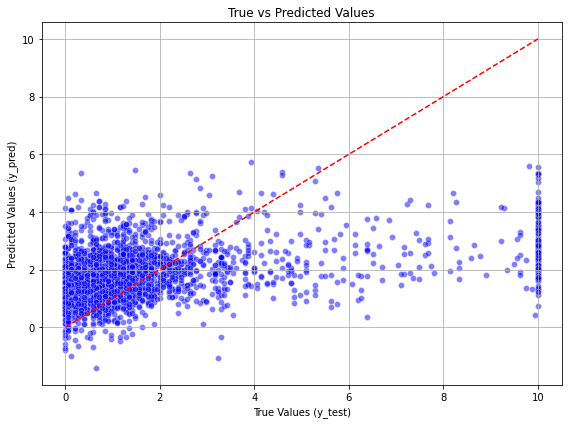

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of true vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.5)  # Scatter plot of y_test vs y_pred

# Plotting the regression line (diagonal line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line for reference

plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('True vs Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import TruncatedSVD  

# Define a function to handle rare categories
def handle_rare_categories(data, threshold=0.01, replacement='rare_category'):
    """
    Handle rare categories by grouping them into a single category.

    Parameters:
    - data: DataFrame containing categorical variables
    - threshold: Threshold for considering a category as rare (default: 0.01)
    - replacement: Replacement value for rare categories (default: 'rare_category')

    Returns:
    - data_processed: DataFrame with rare categories replaced
    """

    data_processed = data.copy()

    for column in data_processed.columns:
        frequencies = data_processed[column].value_counts(normalize=True)
        rare_categories = frequencies[frequencies < threshold].index
        data_processed[column] = data_processed[column].replace(rare_categories, replacement)

    return data_processed

# Load your dataset, for example using pandas
_d = df.dropna(subset=['Total Deaths'])

# Split the dataset into features (X) and target variable (y)
X = _d[['Disaster Type', 'Country', 'mv_gdp', 'mv_imort', 'mv_electy', 'mv_pop_den',
       'mv_co2', 'mv_lf_exp']]   # Features
y = _d['Total Deaths'] # Target variable

# Normalize to the range [0, 10]
min_value = y_winsorized.min()
max_value = y_winsorized.max()
y_normalized = 10 * (y_winsorized - min_value) / (max_value - min_value)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_normalized, test_size=0.2, random_state=42)

# Define the categorical columns
categorical_cols = ['Country', 'Disaster Type']

# Handle rare categories in the categorical columns
X_rare_handled = handle_rare_categories(X[categorical_cols])

# Define the preprocessing steps (one-hot encoding for categorical features and imputation for missing values)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), X_rare_handled.columns),  # Use the handled rare categories columns
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=['number']).columns)
    ],
    remainder='passthrough'
)

# Define the TruncatedSVD step
svd = TruncatedSVD(n_components=30)  

# Define the linear regression model
model = LinearRegression()

# Create a pipeline with preprocessing, TruncatedSVD, and linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svd', svd),
    ('model', model)
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# Extract the components from TruncatedSVD
components = pipeline.named_steps['svd'].components_

# Calculate the importance of each feature in the original space based on the components
feature_importance = np.abs(components).sum(axis=0) / np.abs(components).sum()

# Get the feature names after one-hot encoding
one_hot_feature_names = preprocessor.transformers_[0][1]['onehot'].get_feature_names_out(input_features=X_rare_handled.columns)

# Combine one-hot encoded feature names with numerical feature names
feature_names = list(one_hot_feature_names) + list(X.select_dtypes(include=['number']).columns)

# Create a DataFrame to display feature names along with their importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the importance DataFrame by importance
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame
print(importance_df_sorted.head(20))

Mean Squared Error: 5.242512760499449
R^2 Score: 0.11475462953524862
                                  Feature  Importance
214  Disaster Type_Explosion (Industrial)    0.030263
212              Disaster Type_Earthquake    0.028296
197      Country_United States of America    0.027527
216     Disaster Type_Extreme temperature    0.027526
131                       Country_Nigeria    0.027218
206                     Disaster Type_Air    0.027070
13                     Country_Bangladesh    0.026921
84                      Country_Indonesia    0.026885
83                          Country_India    0.026747
37                          Country_China    0.026577
218    Disaster Type_Fire (Miscellaneous)    0.025712
224     Disaster Type_Mass movement (wet)    0.025339
213                Disaster Type_Epidemic    0.025269
136                      Country_Pakistan    0.024668
230                   Disaster Type_Storm    0.024034
141                   Country_Philippines    0.024020
149          

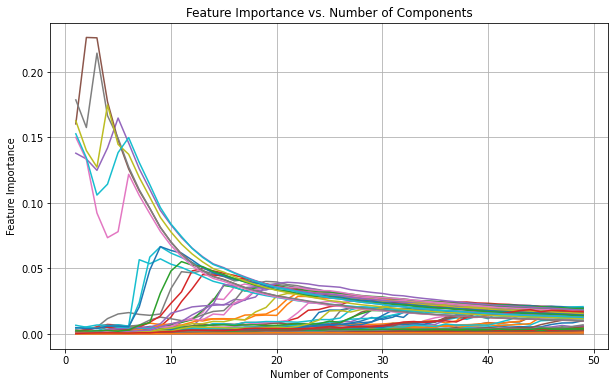

In [61]:
import matplotlib.pyplot as plt

# List to store feature importance scores for each number of components
feature_importance_scores = []

# Range of number of components to try
n_components_range = range(1, 50)

# Iterate over different numbers of components
for n_components in n_components_range:
    # Define TruncatedSVD with the current number of components
    svd = TruncatedSVD(n_components=n_components)
    
    # Create a pipeline with preprocessing and TruncatedSVD
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('svd', svd)
    ])

    # Fit the pipeline on training data
    pipeline.fit(X_train)
    
    # Extract the components from TruncatedSVD
    components = pipeline.named_steps['svd'].components_
    
    # Calculate the importance of each feature based on the components
    feature_importance = np.abs(components).sum(axis=0) / np.abs(components).sum()
    
    # Store the feature importance scores
    feature_importance_scores.append(feature_importance)

# Convert feature importance scores to a numpy array for easier manipulation
feature_importance_scores = np.array(feature_importance_scores)

# Plot feature importance scores against number of components
plt.figure(figsize=(10, 6))
for feature_idx, feature_name in enumerate(feature_names):
    plt.plot(n_components_range, feature_importance_scores[:, feature_idx], label=feature_name)

plt.xlabel('Number of Components')
plt.ylabel('Feature Importance')
plt.title('Feature Importance vs. Number of Components')
#plt.legend(loc='upper right')
plt.grid(True)
plt.show()

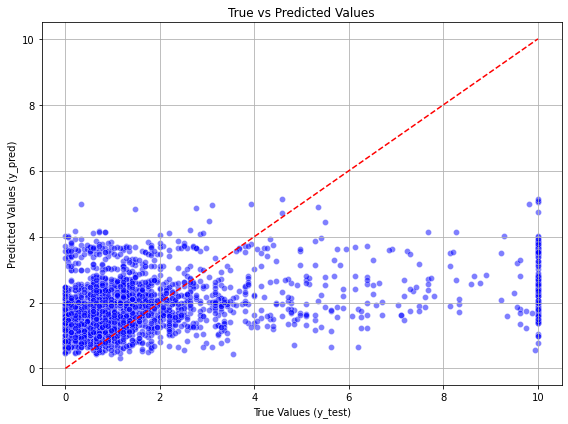

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of true vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.5)  # Scatter plot of y_test vs y_pred

# Plotting the regression line (diagonal line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line for reference

plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('True vs Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()

#### complicated models and normalizations not making much progress, especially when there are large number of deaths. Lets try a simpler model

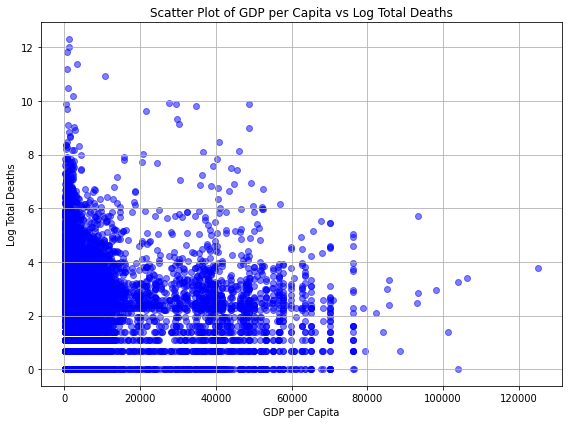

In [63]:
import matplotlib.pyplot as plt

# Calculate the logarithm of 'gdp_per_cap'
x = _d['gdp_per_cap']
y = np.log(_d['Total Deaths'])

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.5)
plt.xlabel('GDP per Capita')
plt.ylabel('Log Total Deaths')
plt.title('Scatter Plot of GDP per Capita vs Log Total Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()


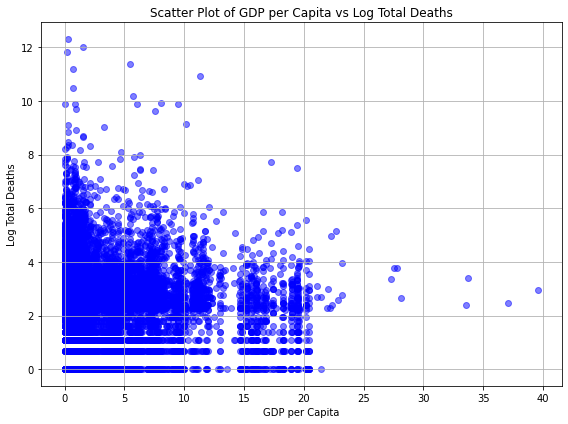

In [64]:
import matplotlib.pyplot as plt

# Calculate the logarithm of 'gdp_per_cap'
x = _d['co2_emissions']
y = np.log(_d['Total Deaths'])

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.5)
plt.xlabel('GDP per Capita')
plt.ylabel('Log Total Deaths')
plt.title('Scatter Plot of GDP per Capita vs Log Total Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()

Coefficients (slopes): [-1.10319340e-02 -1.94676978e-05]
Intercept: 3.0193088630510405
R^2 Score: 0.05144090234732912
RMSE: 1.296233490169477


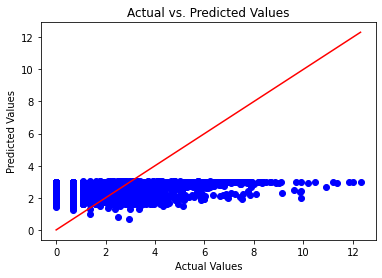

In [65]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

_d = df.dropna(subset=['Total Deaths', 'co2_emissions', 'gdp_per_cap'])
# Sample data
X = _d[['co2_emissions', 'gdp_per_cap']]
y = np.log(_d['Total Deaths'])

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Print the coefficients
print("Coefficients (slopes):", model.coef_)
print("Intercept:", model.intercept_)

# Calculate R^2
r2 = r2_score(y, y_pred)
print("R^2 Score:", r2)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE:", rmse)

# Plot the actual vs. predicted values
plt.scatter(y, y_pred, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


#### Bad Results again, the total deaths is not completely explainable even with log transformations. Individually however, they do seem to be related through exponential decay.

Feature Importances: [0.44045456 0.55954544]
R^2 Score: 0.3357552041964862
RMSE: 1.0847136899000414


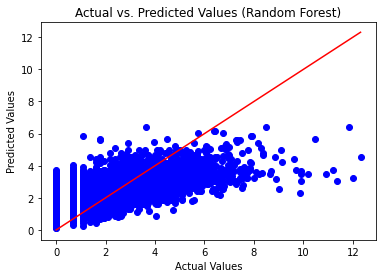

In [73]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

_d = df.dropna(subset=['Total Deaths', 'co2_emissions', 'gdp_per_cap'])
# Sample data
X = _d[['co2_emissions', 'gdp_per_cap']]
y = np.log(_d['Total Deaths'])

# Create and fit the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Print the feature importances
print("Feature Importances:", model.feature_importances_)

# Calculate R^2
r2 = r2_score(y, y_pred)
print("R^2 Score:", r2)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE:", rmse)

# Plot the actual vs. predicted values
plt.scatter(y, y_pred, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.show()


Shape of X_numerical: (10954, 2)
Shape of X_categorical_encoded: (10954, 45)
R^2 Score: 0.5915453659931889
RMSE: 2087.818974977818


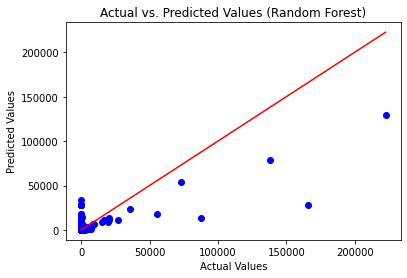

In [97]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

# Assuming 'Country' and 'Disaster Type' are categorical variables in your DataFrame
# Perform one-hot encoding on categorical variables
_d = df.dropna(subset=['Total Deaths', 'co2_emissions', 'gdp_per_cap', 'Country', 'Disaster Type'])

# Sample data
X_numerical = _d[['co2_emissions', 'gdp_per_cap']]
X_categorical = _d[['Subregion', 'Disaster Type']]
y = _d['Total Deaths']

# Perform one-hot encoding on categorical variables
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1])], remainder='passthrough')
X_categorical_encoded = ct.fit_transform(X_categorical)

# Ensure X_numerical and X_categorical_encoded have compatible shapes
print("Shape of X_numerical:", X_numerical.shape)
print("Shape of X_categorical_encoded:", X_categorical_encoded.shape)

# Combine numerical and encoded categorical variables
X = np.concatenate((X_numerical, X_categorical_encoded.toarray()), axis=1)  # Convert X_categorical_encoded to array before concatenation

# Create and fit the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate R^2
r2 = r2_score(y, y_pred)
print("R^2 Score:", r2)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE:", rmse)

# Plot the actual vs. predicted values
plt.scatter(y, y_pred, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.show()



In [98]:
# Get column names for the encoded categorical variables
encoded_column_names = ct.named_transformers_['encoder'].get_feature_names_out(input_features=X_categorical.columns)

# Combine numerical and encoded categorical column names
all_column_names = list(X_numerical.columns) + list(encoded_column_names)

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': all_column_names, 'Importance': feature_importances})

# Sort the DataFrame by feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 30 most important features
print("Top 30 Most Important Features:")
print(feature_importance_df.head(30))


Top 30 Most Important Features:
                                           Feature  Importance
1                                      gdp_per_cap    0.429073
0                                    co2_emissions    0.299399
6        Subregion_Latin America and the Caribbean    0.124781
43                             Disaster Type_Storm    0.086751
25                        Disaster Type_Earthquake    0.023021
45                             Disaster Type_Water    0.015288
14                         Subregion_Southern Asia    0.007930
13                    Subregion_South-eastern Asia    0.006595
4                           Subregion_Eastern Asia    0.002803
29               Disaster Type_Extreme temperature    0.001294
18                        Subregion_Western Europe    0.001138
7                              Subregion_Melanesia    0.000601
15                       Subregion_Southern Europe    0.000454
10                      Subregion_Northern America    0.000258
26                     

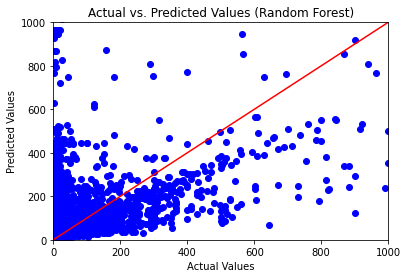

In [114]:
# Plot the actual vs. predicted values
plt.scatter(y, y_pred, color='blue')
plt.plot([0, 1000], [0, 1000], color='red')  # Diagonal line from (0,0) to (500,500)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.xlim(0, 1000)  # Set x-axis limits
plt.ylim(0, 1000)  # Set y-axis limits
plt.show()

###  This model is likely overfitted and not very precise but does provide some information about features which are important when trying to predict an outcome variable like deaths.